Assignment 1: The sinking of the Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t
enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224
passengers and crew. While there was some element of luck involved in surviving, it seems some groups of
people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). Dataset link: https://www.kaggle.com/c/titanic/data


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as pl

In [ ]:
# Load the train and test data
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')

Assignment 2 : It’s difficult to fathom just how vast and diverse our natural world is. There are over 5,000 species of mammals, 10,000 species of birds, 30,000 species of
fish – and astonishingly, over 400,000 different types of flowers.
In this competition, you’re challenged to build a machine learning model that
identifies the type of flowers in a dataset of images (for simplicity, we’re sticking to
just over 100 types). Dataset link: https://www.kaggle.com/c/tpu-getting-started/data


Epoch 1/100
45/45 [==============================] - 1s 5ms/step - loss: 0.6413 - accuracy: 0.6250 - val_loss: 0.6118 - val_accuracy: 0.6313 - lr: 0.0010
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.6924 - val_loss: 0.5722 - val_accuracy: 0.6816 - lr: 0.0010
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7163 - val_loss: 0.5407 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7486 - val_loss: 0.5191 - val_accuracy: 0.7374 - lr: 0.0010
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7711 - val_loss: 0.5016 - val_accuracy: 0.7542 - lr: 0.0010
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4883 - accuracy: 0.7753 - val_loss: 0.4771 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 7/100
45/45 [==============================] - 0s 6ms/step - loss: 0.4

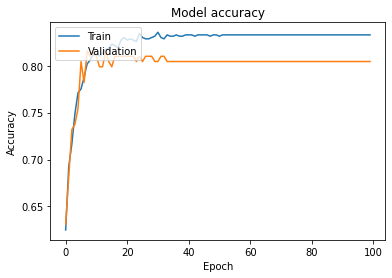

14/14 [==============================] - 0s 1ms/step


In [ ]:
# Preprocessing
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_passenger_ids = test_data['PassengerId']
test_data = test_data.drop(['PassengerId'], axis=1)

# Convert categorical features to numerical labels
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
train_data['Embarked'] = train_data['Embarked'].fillna('Unknown')
test_data['Embarked'] = test_data['Embarked'].fillna('Unknown')
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

# Impute missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())

# Scale the numerical features
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

# Split the training data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(7,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with learning rate scheduling
history = model.fit(train_data.iloc[:, 1:], train_data.iloc[:, 0], validation_data=(val_data.iloc[:, 1:], val_data.iloc[:, 0]),
                    epochs=100, batch_size=16, callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])

# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict on the test set
predictions = model.predict(test_data)

# Convert predictions to binary
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Save predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_passenger_ids, 'Survived': binary_predictions.flatten()})
output.to_csv('submission.csv', index=False)